# DATASET 1

For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
train=pd.read_csv("/content/train (5).csv")
test=pd.read_csv("/content/test (1).csv")

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### Checking information on our dataset 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.shape

(418, 11)

In [ ]:
train.shape

(891, 12)

In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

As we can see, Age is an float instead of integer

### **Checking for duplicates in our columns**

In [ ]:
# Cheking if our dataset contains any duplicate values
train.duplicated().values.any()

False

In [ ]:
# Cheking if our dataset contains any duplicate values
test.duplicated().values.any()

False

### Dropping columns that are not used

In [ ]:
train.drop(columns=['Cabin','PassengerId','Ticket'], inplace=True)
test.drop(columns=['Cabin','PassengerId','Ticket'], inplace=True)

### **Cheking for missing values in our columns**

In [ ]:
#Cheking the sum of msissing values in our columns
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
#Cheking the sum of msissing values in our columns
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

There is missing values in our datasets

### Droping null values

In [ ]:
train.dropna(subset=['Embarked', 'Age'], inplace=True)

In [ ]:
test.dropna(subset=['Fare', 'Age'], inplace=True)

Checking if null values are still there

In [ ]:
# Cheking if our dataset contains any null values
train.isnull().values.any()

False

In [ ]:
# Cheking if our dataset contains any null values
test.isnull().values.any()

False

Converting Age into an integer

In [ ]:
train['Age'] = np.round(train['Age']).astype(int)

test['Age'] = np.round(test['Age']).astype(int)

In [ ]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
test.dtypes

Pclass        int64
Name         object
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
# Creating  a family size column

train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

# Exploratory Data Analysis

In [ ]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,0


## Univariate Analysis

### Categorical

####Train

In [ ]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,0


In [ ]:
train.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [ ]:
train.Sex.value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [ ]:
train.Age.value_counts()

24    32
30    27
28    27
22    27
18    26
      ..
12     1
74     1
53     1
66     1
0      1
Name: Age, Length: 71, dtype: int64

In [ ]:
train.FamilySize.value_counts()

0    402
1    139
2     93
3     27
5     22
6     12
4     11
7      6
Name: FamilySize, dtype: int64

####Test

In [ ]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,0


In [ ]:
test.Sex.value_counts()

male      204
female    127
Name: Sex, dtype: int64

In [ ]:
test.Age.value_counts()

24    17
21    17
22    17
18    16
30    15
      ..
7      1
5      1
3      1
62     1
76     1
Name: Age, Length: 63, dtype: int64

In [ ]:
test.Embarked.value_counts()

S    227
C     82
Q     22
Name: Embarked, dtype: int64

####Bar chart

Train

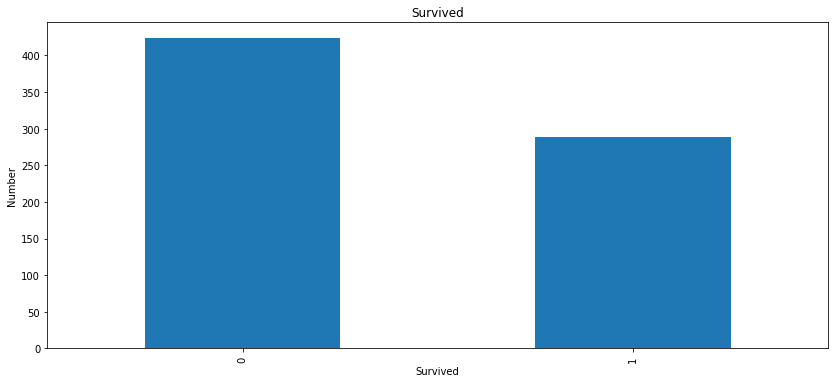

In [ ]:
# Labelling our x axis
plt.xlabel("Survived")

# Labelling our y axis
plt.ylabel("Number")

# Giving a title to our Bar chart
plt.title("Survived")

# Displaying our chart
train.Survived.value_counts().plot(kind = 'bar',figsize =[14,6])


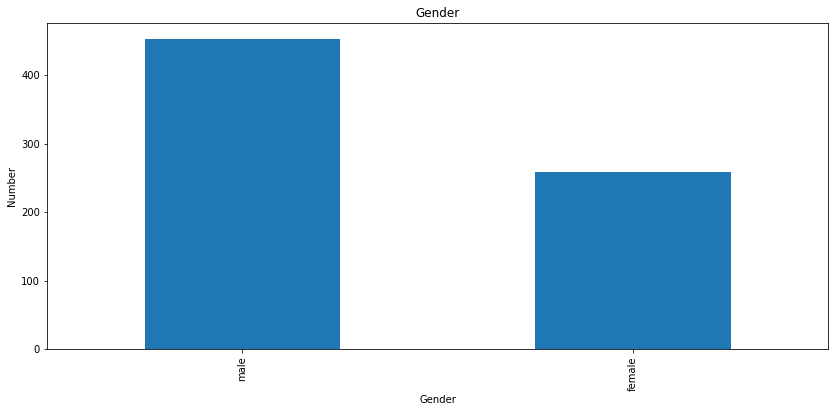

In [ ]:
# Labelling our x axis
plt.xlabel("Gender")

# Labelling our y axis
plt.ylabel("Number")

# Giving a title to our Bar chart
plt.title("Gender")

# Displaying our chart
train.Sex.value_counts().plot(kind = 'bar',figsize =[14,6])


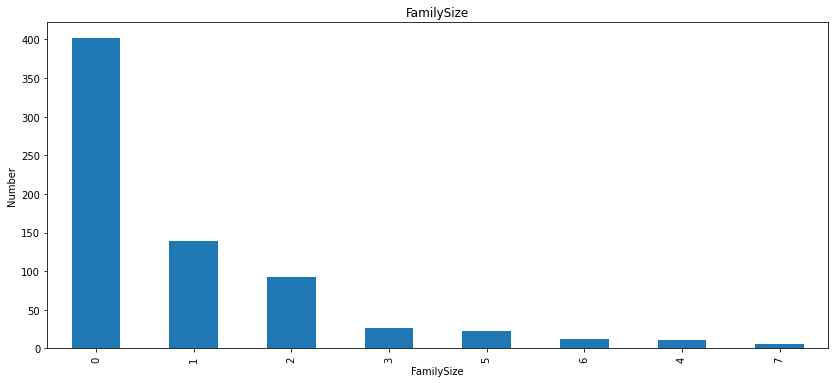

In [ ]:
# Labelling our x axis
plt.xlabel("FamilySize")

# Labelling our y axis
plt.ylabel("Number")

# Giving a title to our Bar chart
plt.title("FamilySize")

# Displaying our chart
train.FamilySize.value_counts().plot(kind = 'bar',figsize =[14,6])


Test

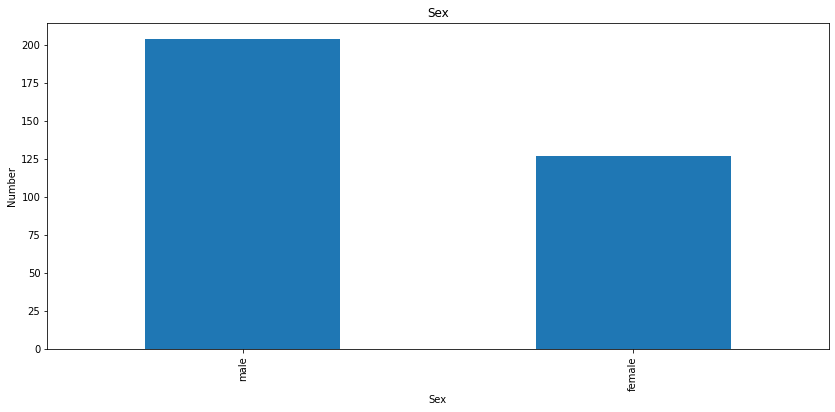

In [ ]:
# Labelling our x axis
plt.xlabel("Sex")

# Labelling our y axis
plt.ylabel("Number")

# Giving a title to our Bar chart
plt.title("Sex")

# Displaying our chart
test.Sex.value_counts().plot(kind = 'bar',figsize =[14,6])


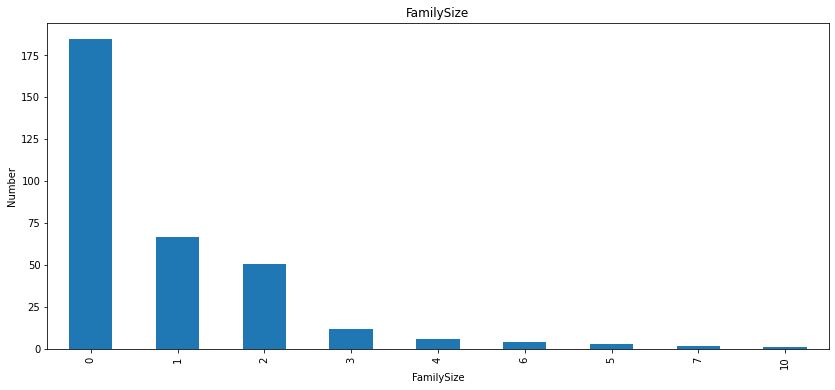

In [ ]:
# Labelling our x axis
plt.xlabel("FamilySize")

# Labelling our y axis
plt.ylabel("Number")

# Giving a title to our Bar chart
plt.title("FamilySize")

# Displaying our chart
test.FamilySize.value_counts().plot(kind = 'bar',figsize =[14,6])


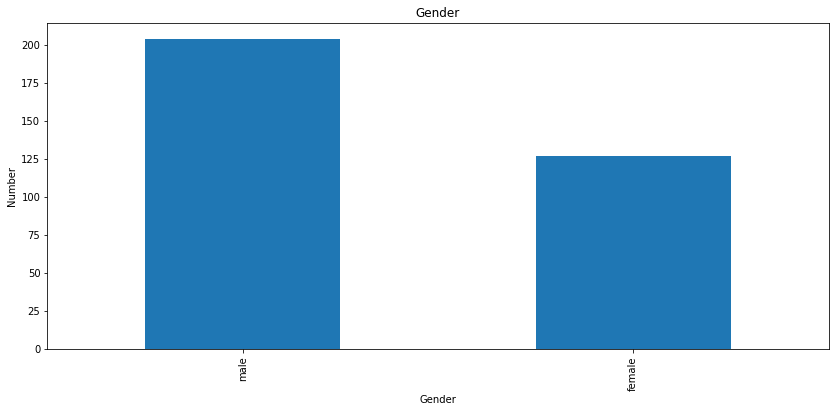

In [ ]:
# Labelling our x axis
plt.xlabel("Gender")

# Labelling our y axis
plt.ylabel("Number")

# Giving a title to our Bar chart
plt.title("Gender")

# Displaying our chart
test.Sex.value_counts().plot(kind = 'bar',figsize =[14,6])


####Pie charts

Train

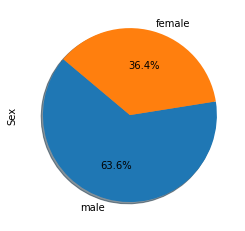

In [ ]:
train.Sex.value_counts(sort=False).plot.pie(labels = Sex, autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.show()

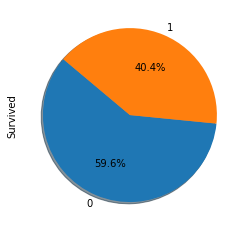

In [ ]:
train.Survived.value_counts(sort=False).plot.pie(labels = Survived, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.show()

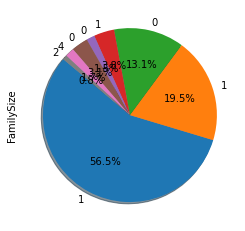

In [ ]:
train.FamilySize.value_counts(sort=False).plot.pie(labels = FamilySize, autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.show()

Test

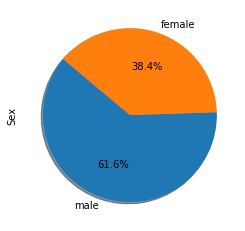

In [ ]:
test.Sex.value_counts(sort=False).plot.pie(labels = Sex, autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.show()

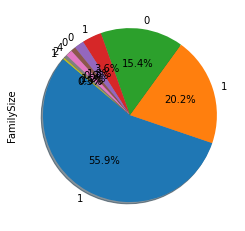

In [ ]:
test.FamilySize.value_counts(sort=False).plot.pie(labels = FamilySize, autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.show()

###Numerical

####Measure of Central Tendancy

#####Train

In [ ]:
!pip install pandas-profiling==2.7.1



import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(train)
prof


Output hidden; open in https://colab.research.google.com to view.

#####Test

In [ ]:
!pip install pandas-profiling==2.7.1



import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(test)
prof


Output hidden; open in https://colab.research.google.com to view.

##Bivariate

###Numerical and Numerical

Train

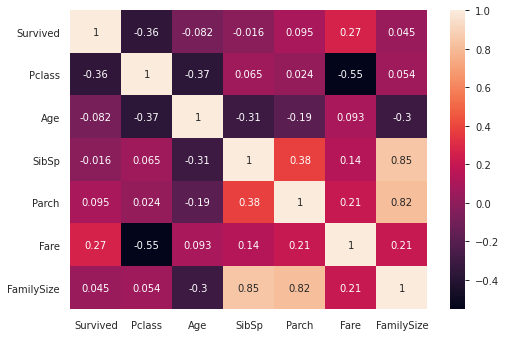

In [ ]:
sns.heatmap(train.corr(),annot=True )
plt.show()

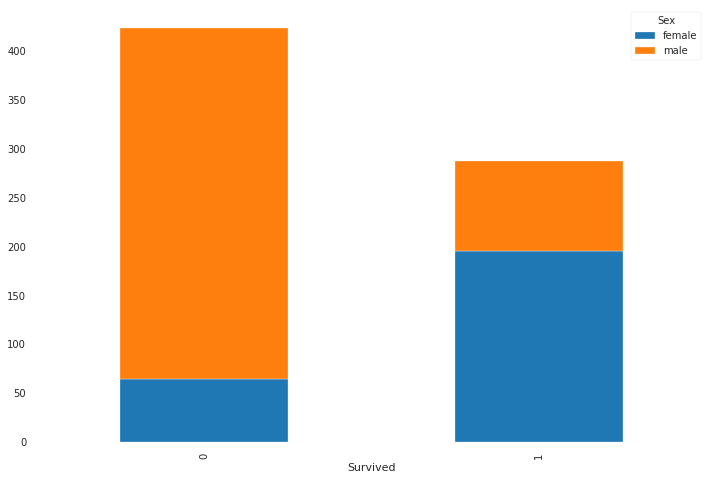

In [ ]:
pd.crosstab(train['Survived'],train['Sex']).plot(kind="bar",stacked=True,figsize=(12,8))


Test

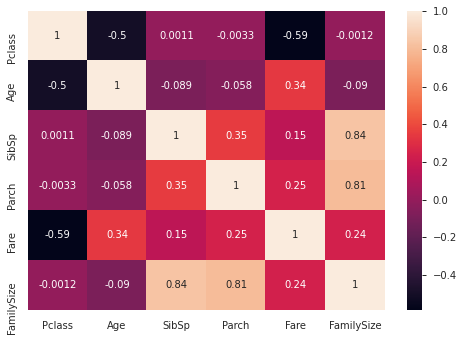

In [ ]:
sns.heatmap(test.corr(),annot=True )
plt.show()

## KNN

###Randomly partition each dataset into two parts i.e 80 - 20  sets.

In [ ]:
# Previewing the train data set that we will split
# 
train.head(3)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,0


In [ ]:
# Dropping the name columns
train = train.drop('Name',axis = 1)
test = test.drop('Name',axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
column = ['Sex','Embarked']
for col_name in column:
       train[col_name] = labelencoder.fit_transform(train[col_name])

In [ ]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
column = ['Sex','Embarked']
for col_name in column:
       test[col_name] = labelencoder.fit_transform(test[col_name])

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22,1,0,7.2500,2,1
1,1,1,0,38,1,0,71.2833,0,1
2,1,3,0,26,0,0,7.9250,2,0
3,1,1,0,35,1,0,53.1000,2,1
4,0,3,1,35,0,0,8.0500,2,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75 15]
 [15 38]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        90
           1       0.72      0.72      0.72        53

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



### Randomly partition each dataset into two parts 70-30 

In [ ]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(A_train)

A_train = scaler.transform(A_train)
A_test = scaler.transform(A_test)

In [ ]:
 
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(A_train, b_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred1 = classifier2.predict(A_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(b_test, y_pred1))
print(classification_report(b_test, y_pred1))

[[100  20]
 [ 27  67]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       120
           1       0.77      0.71      0.74        94

    accuracy                           0.78       214
   macro avg       0.78      0.77      0.78       214
weighted avg       0.78      0.78      0.78       214



### Randomly partition each dataset into two parts 60-40

In [ ]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(A_train)

A_train = scaler.transform(A_train)
A_test = scaler.transform(A_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(A_train, b_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred1 = classifier2.predict(A_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(b_test, y_pred1))
print(classification_report(b_test, y_pred1))

[[114  21]
 [ 21  58]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       135
           1       0.73      0.73      0.73        79

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



In [ ]:
from sklearn.model_selection import train_test_split
W_train, W_test, s_train, s_test = train_test_split(W, s, test_size=0.40)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(W_train)

W_train = scaler.transform(W_train)
W_test = scaler.transform(W_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors=5)
classifier3.fit(W_train, s_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred2 = classifier3.predict(W_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(s_test, y_pred2))
print(classification_report(s_test, y_pred2))

[[143  32]
 [ 27  83]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       175
           1       0.72      0.75      0.74       110

    accuracy                           0.79       285
   macro avg       0.78      0.79      0.78       285
weighted avg       0.80      0.79      0.79       285



##RECOMENDATION

After doing Partitions,the percantages did not change much 
After spilliting it to 80-30, we can see the accuracy being 79% which isnt bad but more information is neede to improve the accuracy.